<a href="https://colab.research.google.com/github/Jlok17/2022MSDS/blob/main/Story_5_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [13]:
df = pd.read_table("https://raw.githubusercontent.com/Jlok17/2022MSDS/main/Source/Data608/graph1.txt", sep = ',')
df2 = pd.read_csv("https://raw.githubusercontent.com/Jlok17/2022MSDS/main/Source/Data608/tornados.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/Jlok17/2022MSDS/main/Source/Data608/US1980-2023.csv")

In [14]:
df.head()

,Year,No_Smoothing,Lowess(5)
0,1880,-0.16,-0.09
1,1881,-0.08,-0.13
2,1882,-0.11,-0.16
3,1883,-0.17,-0.20
4,1884,-0.28,-0.24


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          144 non-null    int64  
 1   No_Smoothing  144 non-null    float64
 2    Lowess(5)    144 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.5 KB


In [16]:
df = df.rename(columns={df.columns[0]: "Year", df.columns[1]: "Temp_change"})
df = df[df['Year'] > 1949]
x = df["Year"]
y = df["Temp_change"]

slope, intercept = np.polyfit(x, y, 1)
y_pred = slope * x + intercept

In [17]:
df2.info()
df2.head()
df2['tornados'] = df2['tornados'].str.replace(r'[^0-9]+','')
df2['tornados'] = df2['tornados'].astype(float)
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        74 non-null     int64 
 1   tornados    74 non-null     object
 2   fatalities  74 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


<ipython-input-17-4568a287dae3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['tornados'] = df2['tornados'].str.replace(r'[^0-9]+','')


,year,tornados,fatalities
0,2023,1237.0,--
1,2022,987.0,16
2,2021,914.0,13
3,2020,1012.0,76
4,2019,1379.0,38


In [18]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       44 non-null     int64  
 1   Tropical Cyclone Count     44 non-null     int64  
 2   Tropical Cyclone Cost      44 non-null     float64
 3   Tropical Cyclone Lower 75  44 non-null     float64
 4   Tropical Cyclone Upper 75  44 non-null     float64
 5   Tropical Cyclone Lower 90  44 non-null     float64
 6   Tropical Cyclone Upper 90  44 non-null     float64
 7   Tropical Cyclone Lower 95  44 non-null     float64
 8   Tropical Cyclone Upper 95  44 non-null     float64
 9   All Disasters Count        44 non-null     int64  
 10  All Disasters Cost         44 non-null     float64
 11  All Disasters Lower 75     44 non-null     float64
 12  All Disasters Upper 75     44 non-null     float64
 13  All Disasters Lower 90     44 non-null     float64
 

,Year,Tropical Cyclone Count,Tropical Cyclone Cost,Tropical Cyclone Lower 75,Tropical Cyclone Upper 75,Tropical Cyclone Lower 90,Tropical Cyclone Upper 90,Tropical Cyclone Lower 95,Tropical Cyclone Upper 95,All Disasters Count,All Disasters Cost,All Disasters Lower 75,All Disasters Upper 75,All Disasters Lower 90,All Disasters Upper 90,All Disasters Lower 95,All Disasters Upper 95
0,1980,1,2.2,1.5,3.0,1.5,3.7,1.1,4.8,1,2.2,1.5,3.0,1.5,3.7,1.1,4.8
1,1981,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1982,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1983,1,9.2,6.4,9.2,5.8,9.5,5.5,9.8,1,9.2,6.4,9.2,5.8,9.5,5.5,9.8
4,1984,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


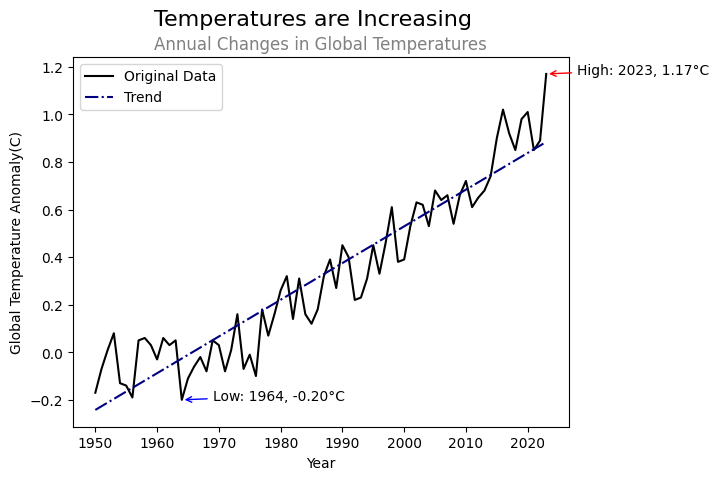

In [19]:
# Graph 1
plt.plot(df["Year"], df["Temp_change"], label = 'Original Data', color = 'black')
plt.plot(x, y_pred, linestyle='-.', label='Trend', color = 'navy')
plt.xlabel('Year')
plt.ylabel('Global Temperature Anomaly(C)')
plt.title('Annual Changes in Global Temperatures', color='gray')
plt.suptitle('Temperatures are Increasing', fontsize=16)

# Min/Max Point
max_temp_year = df.loc[df["Temp_change"].idxmax(), "Year"]
max_temp_value = df["Temp_change"].max()
min_temp_year = df.loc[df["Temp_change"].idxmin(), "Year"]
min_temp_value = df["Temp_change"].min()

plt.annotate(f'High: {max_temp_year}, {max_temp_value:.2f}°C',
             xy=(max_temp_year, max_temp_value),
             xytext=(max_temp_year+5, max_temp_value),
             arrowprops=dict(arrowstyle='->', color='red'))

plt.annotate(f'Low: {min_temp_year}, {min_temp_value:.2f}°C',
             xy=(min_temp_year, min_temp_value),
             xytext=(min_temp_year+5, min_temp_value),
             arrowprops=dict(arrowstyle='->', color='blue'))
plt.legend()
plt.show()

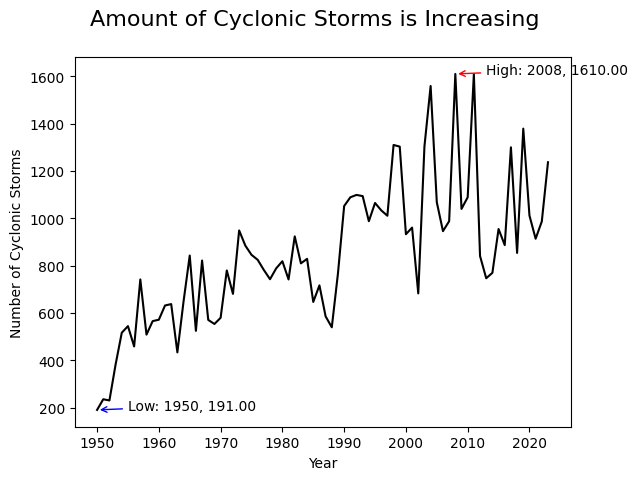

In [20]:
# Graph 2
plt.plot(df2['year'], df2['tornados'], color = 'black')
plt.xlabel('Year')
plt.ylabel('Number of Cyclonic Storms')
plt.suptitle('Amount of Cyclonic Storms is Increasing', fontsize=16)

# Min/Max Point
max_temp_year = df2.loc[df2["tornados"].idxmax(), "year"]
max_temp_value = df2["tornados"].max()
min_temp_year = df2.loc[df2["tornados"].idxmin(), "year"]
min_temp_value = df2["tornados"].min()

plt.annotate(f'High: {max_temp_year}, {max_temp_value:.2f}',
             xy=(max_temp_year, max_temp_value),
             xytext=(max_temp_year+5, max_temp_value),
             arrowprops=dict(arrowstyle='->', color='red'))


plt.annotate(f'Low: {min_temp_year}, {min_temp_value:.2f}',
             xy=(min_temp_year, min_temp_value),
             xytext=(min_temp_year+5, min_temp_value),
             arrowprops=dict(arrowstyle='->', color='blue'))

plt.show()

Text(0.5, 0.98, 'Total Damage has been Increasing in Magnitude')

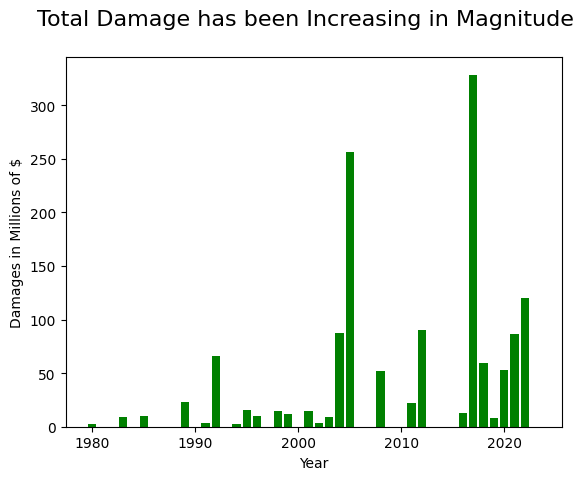

In [21]:
# Graph 3
plt.bar(df3['Year'], df3['All Disasters Cost'], color = 'green')
plt.xlabel('Year')
plt.ylabel('Damages in Millions of $')
plt.suptitle('Total Damage has been Increasing in Magnitude', fontsize=16)